In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_feather('C:/Users/DELL Latitude E5450/Documents/Python Scripts/Github/CO2/feather.csv')
df.tail()

,Country,Mk,Cn,r,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),IT,year,Fuel consumption
31276608,GB,SUBARU,XV I SE PREM E BOXER AWD CVT,1,1628.0,1735.0,180.0,PETROL,H,1995.0,110.0,e13 22,2020,NaN
31276609,GB,SUBARU,OUTBACK SE PREM SYM AWD CVT,1,1696.0,1795.0,193.0,PETROL,M,2498.0,129.0,None,2020,NaN
31276610,GB,SUBARU,XV I SE PREM E BOXER AWD CVT,1,1628.0,1735.0,180.0,PETROL,H,1995.0,110.0,e13 22,2020,NaN
31276611,GB,SUBARU,OUTBACK SE PREM SYM AWD CVT,1,1696.0,1795.0,193.0,PETROL,M,2498.0,129.0,None,2020,NaN
31276612,GB,SUBARU,BRZ SE LUX LTD,1,1311.0,NaN,191.0,PETROL,None,NaN,NaN,None,2020,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31276613 entries, 0 to 31276612
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Country            object 
 1   Mk                 object 
 2   Cn                 object 
 3   r                  int64  
 4   m (kg)             float64
 5   Mt                 float64
 6   Ewltp (g/km)       float64
 7   Ft                 object 
 8   Fm                 object 
 9   ec (cm3)           float64
 10  ep (KW)            float64
 11  IT                 object 
 12  year               int64  
 13  Fuel consumption   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 3.3+ GB


In [8]:
df['r'].value_counts()

1     31276602
2            6
4            2
20           1
22           1
10           1
Name: r, dtype: int64

In [9]:
df['Fm'].value_counts()

M    26933945
H     1996493
E     1106103
P      824725
B      402362
F        8370
b        4596
Name: Fm, dtype: int64

In [10]:
df['IT'].value_counts()

E2 17          1215116
E9 17           426374
E2 17 19        398824
e24 17 19       378590
e3 17           295272
                ...   
E24 3 19             1
E 13 19              1
E8 17 28 29          1
e1-08                1
E1319                1
Name: IT, Length: 363, dtype: int64

In [34]:
df['Fuel consumption '].value_counts()

Series([], Name: Fuel consumption , dtype: int64)

In [3]:
print(df.Fm.value_counts(normalize=True))
#print(df.Fm.value_counts())

M    0.861153
H    0.063833
E    0.035365
P    0.026369
B    0.012865
F    0.000268
b    0.000147
Name: Fm, dtype: float64


In [4]:
cdf = df[['ec (cm3)','m (kg)','Ewltp (g/km)','year']]
cdf.tail(9)

,ec (cm3),m (kg),Ewltp (g/km),year
31276604,1995.0,1628.0,180.0,2020
31276605,1600.0,1500.0,180.0,2020
31276606,1995.0,1762.0,185.0,2020
31276607,1995.0,1600.0,199.0,2020
31276608,1995.0,1628.0,180.0,2020
31276609,2498.0,1696.0,193.0,2020
31276610,1995.0,1628.0,180.0,2020
31276611,2498.0,1696.0,193.0,2020
31276612,NaN,1311.0,191.0,2020


In [5]:
cdf= cdf.fillna(0)

In [6]:
cdf.tail(9)

,ec (cm3),m (kg),Ewltp (g/km),year
31276604,1995.0,1628.0,180.0,2020
31276605,1600.0,1500.0,180.0,2020
31276606,1995.0,1762.0,185.0,2020
31276607,1995.0,1600.0,199.0,2020
31276608,1995.0,1628.0,180.0,2020
31276609,2498.0,1696.0,193.0,2020
31276610,1995.0,1628.0,180.0,2020
31276611,2498.0,1696.0,193.0,2020
31276612,0.0,1311.0,191.0,2020


In [7]:
old_names = ['ec (cm3)','m (kg)','Ewltp (g/km)','year'] 
new_names = ['Engine_Size', 'Weight', 'CO2_Emission','Year']
cdf.rename(columns=dict(zip(old_names, new_names)), inplace=True)

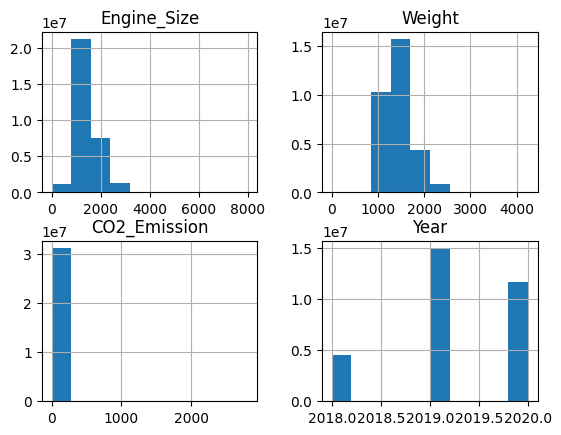

In [8]:
viz = cdf[['Engine_Size', 'Weight', 'CO2_Emission','Year']]
viz.hist()
plt.show()

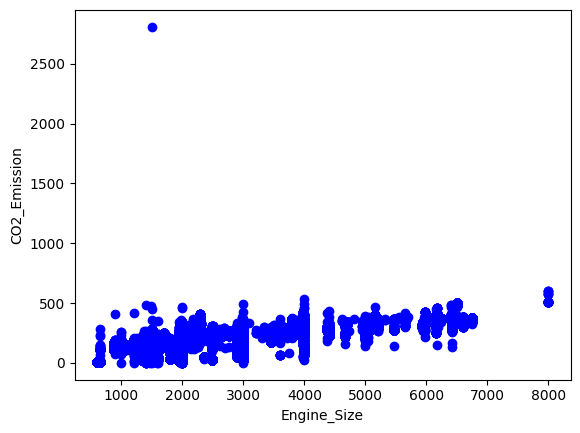

In [38]:
plt.scatter(cdf.Engine_Size, cdf.CO2_Emission,  color='blue')
plt.xlabel('Engine_Size')
plt.ylabel('CO2_Emission')
plt.show()

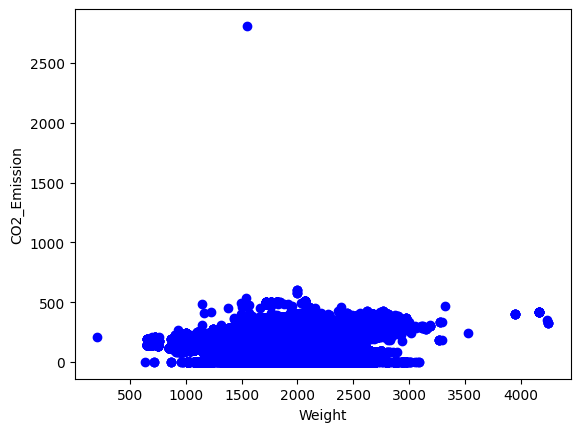

In [39]:
plt.scatter(cdf.Weight, cdf.CO2_Emission,  color='blue')
plt.xlabel("Weight")
plt.ylabel("CO2_Emission")
plt.show()

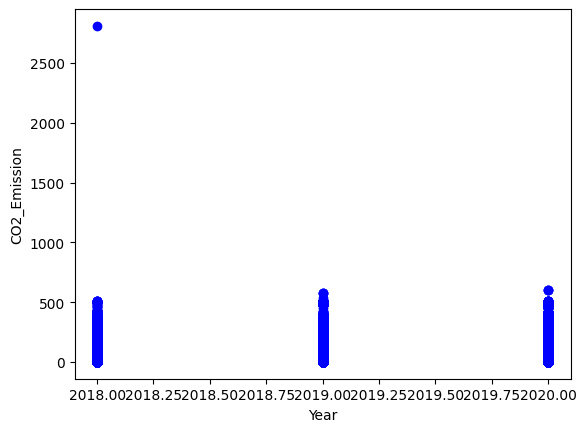

In [40]:
plt.scatter(cdf.Year, cdf.CO2_Emission,  color='blue')
plt.xlabel('Year')
plt.ylabel('CO2_Emission')
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

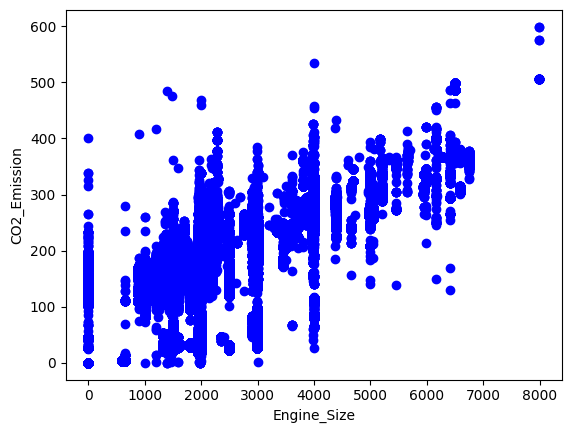

In [58]:
plt.scatter(train.Engine_Size, train.CO2_Emission, color='blue')
#plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'red')
plt.xlabel("Engine_Size")
plt.ylabel("CO2_Emission")
plt.show()

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emission']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[0.04831926]]
Intercept:  [69.28334922]


Text(0, 0.5, 'CO2_Emission')

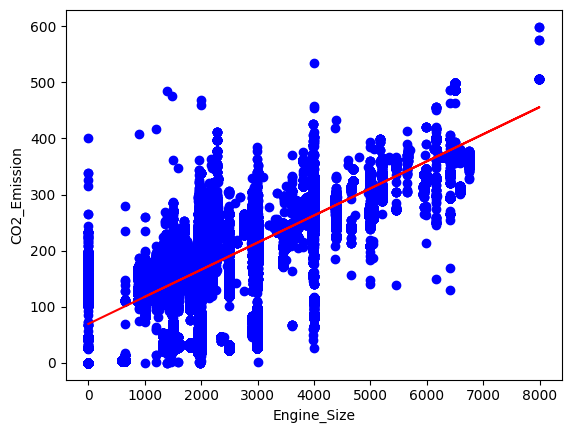

In [60]:
plt.scatter(train.Engine_Size, train.CO2_Emission,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'red')
plt.xlabel("Engine_Size")
plt.ylabel("CO2_Emission")

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emission']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.10
Residual sum of squares (MSE): 1020.89
R2-score: -0.34


In [17]:
from sklearn.model_selection import train_test_split

data = cdf.iloc[:, 0:2]
target = cdf.iloc[:, 3]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [18]:
#PREPROCESSING

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))
print(X_test_scaled.mean(axis=0))

[-1.45490749e-16  6.67784865e-17]
[1. 1.]
[-0.00036788  0.00010349]


In [19]:
# K-nearest neighbors

from sklearn import neighbors
from sklearn import model_selection

parameters= { 'n_neighbors' : range(2,51) }
knn = neighbors.KNeighborsClassifier()        
grid=model_selection.GridSearchCV(knn,parameters)
grid.fit(X_train_scaled,y_train.values.ravel())
grid.best_params_

# Prediction on test set
Y_pred = grid.predict( X_test_scaled)
model_knn=grid.best_estimator_
model_knn.score(X_test_scaled,y_test)

# Display the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,Y_pred)
confusion_matrix

In [ ]:
# SVM

from sklearn import ensemble
from sklearn import svm

# import support vector classifier
parameters = { 'kernel' : ['rbf','linear'],'C':[0.1,1,10,50] }
model = svm.SVC()        
grid=model_selection.GridSearchCV(model,parameters)
grid.fit(X_train_scaled,y_train.values.ravel())
grid.best_params_

# Prediction on test set
Y_pred = grid.predict( X_test_scaled )
model_sv=grid.best_estimator_
model_sv.score(X_test_scaled,y_test)

# Display the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,Y_pred)
confusion_matrix

In [ ]:
# Random Forest

parameters = { "max_features": ["sqrt","log2",None],
"min_samples_split": range(2,31,2) }
model = ensemble.RandomForestClassifier()        
grid=model_selection.GridSearchCV(model,parameters)
grid.fit(X_train_scaled,y_train.values.ravel())
grid.best_params_

# Prediction on test set
Y_pred = grid.predict( X_test_scaled )
model_forest=grid.best_estimator_
model_forest.score(X_test_scaled,y_test)

# Display the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,Y_pred)
confusion_matrix

In [ ]:
data.to_feather("test.feather")